#Импорт библиотек

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom_test
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import ttest_ind

###Просмотр и обработка данных для дальнейшей работы

In [2]:
employee_data = pd.read_csv('/content/М.Тех_Данные_к_ТЗ_DS.csv',sep=',', encoding = 'cp1251', quoting=3)
employee_data.head()

,"""Количество больничных дней","""""Возраст""""","""""Пол"""""""
0,"""5",39,"""""Ж"""""""
1,"""4",54,"""""М"""""""
2,"""4",26,"""""М"""""""
3,"""5",42,"""""М"""""""
4,"""4",29,"""""М"""""""


In [4]:
#Убираем кавычки и меняем названия колонок для удобства работы с ними

employee_data = employee_data.rename(columns= lambda x: x.replace('"',''))\
                             .rename(columns= {'Количество больничных дней': 'work_days','Возраст': 'age','Пол':'sex'})

In [6]:
#Убираем кавычки в строках
employee_data['work_days'] = employee_data['work_days'].str.replace(r"[\"]", '')
employee_data['sex'] = employee_data['sex'].str.replace(r"[\"]", '')

<ipython-input-6-9e1e716c181c>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  employee_data['work_days'] = employee_data['work_days'].str.replace(r"[\"]", '')
<ipython-input-6-9e1e716c181c>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  employee_data['sex'] = employee_data['sex'].str.replace(r"[\"]", '')


In [7]:
employee_data

,work_days,age,sex
0,5,39,Ж
1,4,54,М
2,4,26,М
3,5,42,М
4,4,29,М
...,...,...,...
232,5,30,М
233,4,36,Ж
234,2,60,Ж
235,2,44,Ж


In [ ]:
employee_data.dtypes


work_days    object
age           int64
sex          object
dtype: object

In [31]:
#Меняем тип данных для колонки work_days
employee_data['work_days'] = employee_data['work_days'].astype (str).astype (int)

In [32]:
employee_data.dtypes

work_days     int64
age           int64
sex          object
dtype: object

##1. Мужчины пропускают в течение года более 2 рабочих дней (work_days) по болезни значимо чаще женщин. Проверяем так ли это в наших данных. Проверим эту гипотезу, установим зависимость количества больничных дней от гендерного признака.

In [11]:
#Считаем количество мужчин, взявших больше 2-х больничных дней
mens_work_days =employee_data.query('sex == "М"')\
                             .query('work_days > 2')\
                             .agg ({'sex':'count'})

mens_work_days

sex    84
dtype: int64

In [12]:
#Считаем количество женщин, взявших больше 2-х больничных дней
womens_work_days = employee_data.query('sex == "Ж"')\
                              .query('work_days > 2')\
                              .agg ({'sex':'count'})
womens_work_days

sex    67
dtype: int64

<ipython-input-15-25dfbd6177b3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(employee_data.query('sex == "Ж"').work_days)
<ipython-input-15-25dfbd6177b3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(employee_data.query('sex == "М"').work_days)


<Axes: xlabel='work_days', ylabel='Density'>

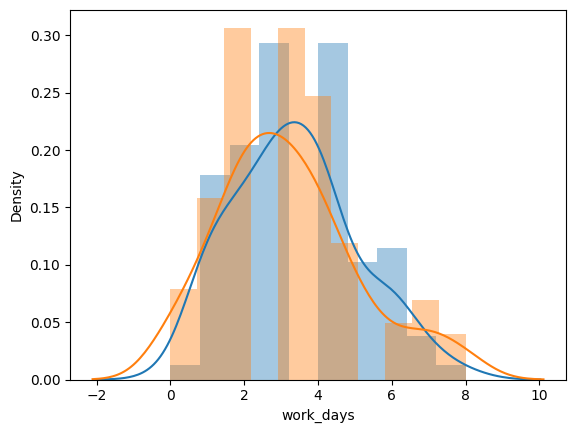

In [15]:
#Визуализируем распределение по гендерному признаку
sns.distplot(employee_data.query('sex == "Ж"').work_days)
sns.distplot(employee_data.query('sex == "М"').work_days)

###Биномиальный тест.H0 гипотеза заключается в равенстве сотрудников, взявших более 2-х больничных дней. H1 - большее число сотрудников-мужчины.

In [18]:
bins = employee_data.query('work_days > 2')['sex'].value_counts().tolist()
print(bins)

[84, 67]


###Поскольку это значение p (0,1927) не меньше 0,05, мы не можем отвергнуть нулевую гипотезу. У нас нет достаточных доказательств, чтобы сказать, что больше всего больничных берут мужчины.

In [21]:
binom_test(bins)

<ipython-input-21-e1b6044464f4>:1: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  binom_test(bins)


0.1927259101754288

###T-test. Наша нулевая гипотеза: нет значимого отличия, кто берет больше больничных дней, мужчины или женщины.

In [72]:
employees = []
n = 1
#создаем цикл, где случайно выбираем 30 сотрудников с больничными более 2 и считаем количество женщин и мужчин в этой выборке.
while n < 500:
    n += 1
    sample =  employee_data[employee_data['work_days'] >= 2].sample(30)['sex'].value_counts()
    employees.append(sample)
employees

[М    20
 Ж    10
 Name: sex, dtype: int64,
 М    20
 Ж    10
 Name: sex, dtype: int64,
 М    16
 Ж    14
 Name: sex, dtype: int64,
 Ж    16
 М    14
 Name: sex, dtype: int64,
 М    16
 Ж    14
 Name: sex, dtype: int64,
 М    23
 Ж     7
 Name: sex, dtype: int64,
 М    19
 Ж    11
 Name: sex, dtype: int64,
 М    20
 Ж    10
 Name: sex, dtype: int64,
 М    17
 Ж    13
 Name: sex, dtype: int64,
 М    16
 Ж    14
 Name: sex, dtype: int64,
 М    16
 Ж    14
 Name: sex, dtype: int64,
 Ж    16
 М    14
 Name: sex, dtype: int64,
 М    19
 Ж    11
 Name: sex, dtype: int64,
 М    16
 Ж    14
 Name: sex, dtype: int64,
 М    16
 Ж    14
 Name: sex, dtype: int64,
 М    19
 Ж    11
 Name: sex, dtype: int64,
 М    19
 Ж    11
 Name: sex, dtype: int64,
 М    17
 Ж    13
 Name: sex, dtype: int64,
 М    17
 Ж    13
 Name: sex, dtype: int64,
 М    16
 Ж    14
 Name: sex, dtype: int64,
 Ж    16
 М    14
 Name: sex, dtype: int64,
 М    20
 Ж    10
 Name: sex, dtype: int64,
 М    19
 Ж    11
 Name: sex, dt

###Так p-value незначим, мы не можем отвергнуть нулевую гипотезу, распределение мужчин и женщин в нашей выборке случайно.

In [71]:
shapiro(employees) #критерий Шапиро-Уилка

ShapiroResult(statistic=0.9894576668739319, pvalue=1.3891144590161275e-06)

###Левене.Равенство дисперсий. Мы видим, что p-value большой, а значит, принимаем нулевую гипотезу о равенстве дисперсий.

In [88]:
m_work_days =employee_data[employee_data['sex'] == "М"].sample(30)['work_days']
w_work_days =employee_data[employee_data['sex'] == "Ж"].sample(30)['work_days']




In [89]:
levene(m_work_days, w_work_days, center = 'mean') #тест Левене

LeveneResult(statistic=0.2173177469150573, pvalue=0.6428374132011012)

###Принимаем, что дисперсии не равны (поправка Уэлча) но p-value снова большой, что не дает нам отвергнуть нулевую гипотезу о случайности гендерного разделения.

In [91]:
ttest_ind(m_work_days, w_work_days, equal_var=True)

TtestResult(statistic=-0.40675750026933355, pvalue=0.6856832474869343, df=58.0)

##2.Работники старше 35 лет пропускают в течение года более 2 рабочих дней по болезни значимо чаще своих более молодых коллег.

In [145]:
#Проверяем наши данные
older_35 = employee_data.query('age >= 35').query('work_days > 2').agg({'sex':'count'})
younger_35 = employee_data.query('age < 35').query('work_days > 2').agg({'sex':'count'})


In [148]:
print(int(older_35), int(younger_35))

120 31


<Axes: xlabel='age', ylabel='work_days'>

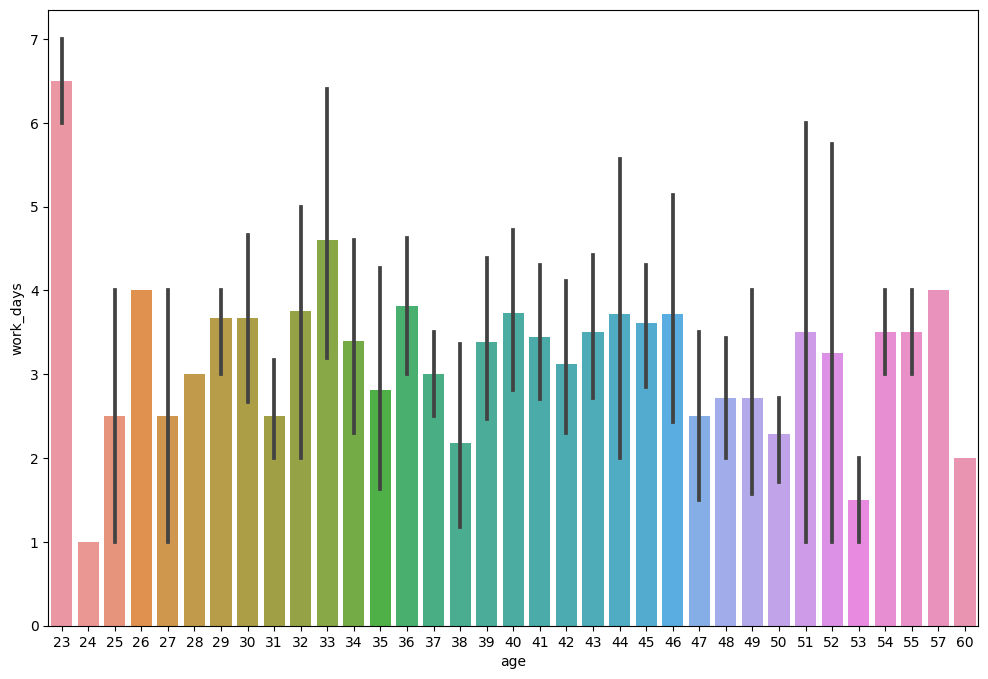

In [127]:
#Согласно графику людей в целом старше 35 больше
plt.figure(figsize=(12, 8))
sns.barplot(employee_data, x="age", y="work_days")

<ipython-input-130-08243e147adf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(employee_data.query('age >= 35').work_days)
<ipython-input-130-08243e147adf>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(employee_data.query('age < 35').work_days)


<Axes: xlabel='work_days', ylabel='Density'>

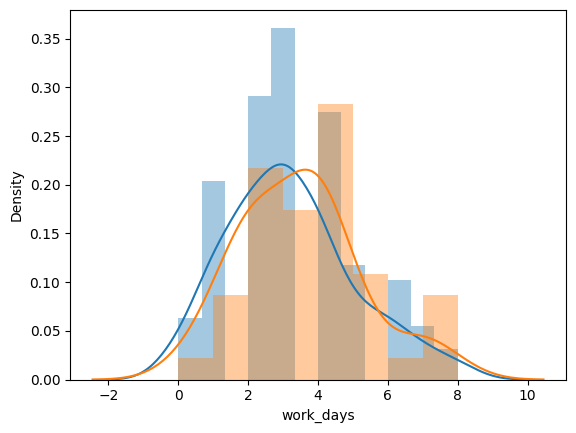

In [130]:
#Визуализируем распределение по возрастному признаку
sns.distplot(employee_data.query('age >= 35').work_days)
sns.distplot(employee_data.query('age < 35').work_days)

###Биномиальный тест.H0 гипотеза заключается в равенстве сотрудников, взявших более 2-х больничных дней. H1 - большее число сотрудников старше 35.

In [134]:
bins = []
bins.append(int(older_35))
bins.append(int(younger_35))
print(bins)

[120, 31]


###В данном случае очень большой p-value, это говорит о том, что у нас недостаточно доказательств зависимости количества дней от возраста.

In [135]:
binom_test(bins)

<ipython-input-135-e1b6044464f4>:1: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  binom_test(bins)


1.4706656242721364e-13

###T-test. Наша нулевая гипотеза: нет значимого отличия, какого возраста сотрудник берет больше 2-х больничных дней.

In [138]:
employee_2 = []
n = 1
#создаем цикл, где случайно выбираем 30 сотрудников с больничными более 2 и считаем количество сотрудников разных возрастов в этой выборке.
while n < 500:
    n += 1
    sample =  employee_data[employee_data['work_days'] >= 2].sample(50)['age'].value_counts()
    employee_2.append(sample)


###P-value слишком большой, что говорит об абсолютной случайности в выборке по возрасту.

In [139]:
shapiro(employees) #критерий Шапиро-Уилка

ShapiroResult(statistic=0.9877411127090454, pvalue=2.0950776047357067e-07)

###Равенство дисперсий. Принимаем гипотезу о равенстве, так как p больше 0.05




In [142]:
older_work_days =employee_data[employee_data['age'] >= 35].sample(20)['work_days'] #берем 20 сэмплов, так как младше 35 всего 46 человек.
younger_work_days =employee_data[employee_data['age'] < 35].sample(20)['work_days']

In [146]:
levene(older_work_days, younger_work_days , center = 'mean') #тест Левене

LeveneResult(statistic=1.0288736118455835, pvalue=0.3168385690135028)

###При принятии неравных дисперсий, p остается высоким. Что позволяет нам не отвергать гипотезу о независимости количество больничных дней от возраста.

In [147]:
ttest_ind(older_work_days, younger_work_days, equal_var=True)

TtestResult(statistic=0.0, pvalue=1.0, df=38.0)

#Доказательтсво гипотез были от обратного по обоим заданиям. По результатам исследования, можно сказать о независимости критерия возраста и гендера на больничные дни.